In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import morphology, color, segmentation, feature, filters, io
from sklearn import cluster
import cv2
%matplotlib inline

In [2]:
from ImagePreprocessing import bckgrnd_correc_rect
from ImagePreprocessing import bckgrnd_correc_sq
from ImagePreprocessing import bckgrnd_correc_disk
from ImagePreprocessing import convert_to_grayscale

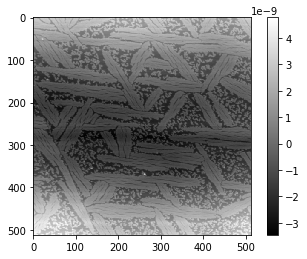

In [3]:
I1_test = np.loadtxt('tdj_grbp5_1um_1hr_3rd_020717.001.txt')
#plt.gray()
plt.imshow(I1_test, cmap = 'gray', interpolation = 'nearest')
plt.colorbar()

In [18]:
I1_mod = np.loadtxt('tdj_grbp5_1um_1hr_3rd_020717.001.txt')
I1_mod[20:30,20:30]=float(3e-9)

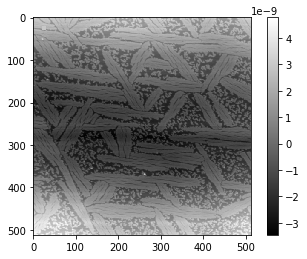

In [19]:
plt.imshow(I1_mod, cmap = 'gray', interpolation = 'nearest')

plt.colorbar()

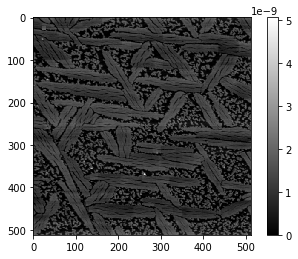

In [20]:
a = np.uint8(40)
b = np.uint8(40)
ch = bckgrnd_correc_rect(I1_mod,a,b)
#cj = morphology.white_tophat(I1_test, morphology.rectangle(a,b))


In [27]:
data = pd.read_csv('tdj_grbp5_1um_1hr_3rd_020717.001.txt', sep=" ")
#plt.imshow(data, cmap = 'gray', interpolation = 'nearest')
#plt.colorbar()

### Function for bckgrnd_correc_rect

In [ ]:
def bckgrnd_correc_rect(image, row_len, col_len):
    
    """Background correction using a rectangular structuring element. This function uses white_tophat from 
    skimage.morphology to return image minus the morphological opening obtained from the structuring element."""
    
    # Checking the right data type for the input image
    assert type(image) == np.ndarray, ('Wrong data type', 'image must be a numpy array')
        
    # Checking the right data type for the row length of the rectangular structuring element
    assert type(row_len) == np.uint8, ('Wrong data type', 'row length must be a unassigned integer of dtype np.uint8')
    
   # Checking the right data type for the row length of the rectangular structuring element
    assert type(col_len) == np.uint8, ('Wrong data type', 'row length must be a unassigned integer of dtype np.uint8')
    
    # background corrrection 
    image_bckgrnd_corrected = morphology.white_tophat(image, morphology.rectangle(row_len,col_len))
    
    # plotting image
    plt.gray()
    plt.imshow(image_bckgrnd_corrected)
    plt.colorbar()
    
    return image_bckgrnd_corrected



### Unit Test for bckgrnd_correc_rect

In [ ]:
def test_bckgrnd_correc_rect():
    
    
     # try pandas loaded image data    
    data = pd.read_csv('~/tdj_grbp5_1um_1hr_3rd_020717.001.txt', sep=" ")
    try:
        bckgrnd_correc_rect(data,a,b)
    except Exception:
        pass
    else: 
        raise Exception('Use np.loadtxt to process image data. Check function for error')
        
    
    # try oddball input
    a = 60
    b = 60
    try:
        bckgrnd_correc_rect(I1_test,a,b)
    except Exception:
        pass
    else: 
        raise Exception('Morphology.rectangle only takes np.uint8 dtype for structuring dimensions. Check function for error')
        
    return

### Function for bckgrnd_correc_sq

In [ ]:
def bckgrnd_correc_sq(image, length):
    
    """Background correction using a square structuring element. This function uses white_tophat from 
    skimage.morphology to return image minus the morphological opening obtained from the structuring element."""
    
    # Checking the right data type for the input image
    assert type(image) == np.ndarray, ('Wrong data type', 'image must be a numpy array')
    
    # Checking the right data type for the length of the square structuring element
    assert type(length) == float, ('Wrong data type', 'length of the square structuring element must be a float')
    
    # background correction
    image_bckgrnd_corrected = morphology.white_tophat(image, morphology.square(length))
    
    # plotting image
    plt.gray()
    plt.imshow(image_bckgrnd_corrected)
    plt.colorbar()
    
    return image_bckgrnd_corrected

### Unit Test for bckgrnd_correc_sq

In [ ]:
def test_bckgrnd_correc_sq():
    
    
    return

### Function for bckgrnd_correc_disk

In [ ]:
def bckgrnd_correc_disk(image, radius):
    
    """Background correction using a disk structuring element. This function uses white_tophat from 
    skimage.morphology to return image minus the morphological opening obtained from the structuring element."""
    
    # Checking the right data type for the input image
    assert type(image) == np.ndarray, ('Wrong data type', 'image must be a numpy array')
    
    # Checking the right data type for the length of the square structuring element
    assert type(radius) == float, ('Wrong data type', 'radius of the disk structuring element must be a float')
    
    # background correction
    image_bckgrnd_corrected = morphology.white_tophat(image, morphology.disk(radius))
    
    # plotting image
    plt.gray()
    plt.imshow(image_bckgrnd_corrected)
    plt.colorbar()
    
    return image_bckgrnd_corrected
        

### Unit Test for bckgrnd_correc_disk

In [ ]:
def test_bckgrnd_correc_disk():
    
    return

### Function for convert_ to_grayscale

In [ ]:
def convert_to_grayscale(image):
    
    """Converting the image to grayscale - where minimum pixel value is 0.0 and maximum pixel value is 1.0"""
    
    # Checking the right data type for the input image
    assert type(image) == np.ndarray, ('Wrong data type', 'image must be a numpy array')
    
    # converting to grayscale
    dst = np.zeros(image.shape)
    image_gray = cv2.normalize(image, dst, 0.0, 1.0, cv2.NORM_MINMAX)
    
    # plotting the image
    plt.gray()
    plt.imshow(image_gray)
    plt.colorbar()
    
    return image_gray

### Unit Test for convert_to_grayscale

In [ ]:
def test_convert_to_grayscale():
    
    return